In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('drug.csv').drop(columns=['Unnamed: 0'])
# df = pd.read_csv('drug.csv')
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


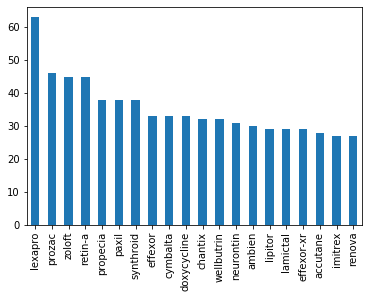

In [3]:
df['urlDrugName'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

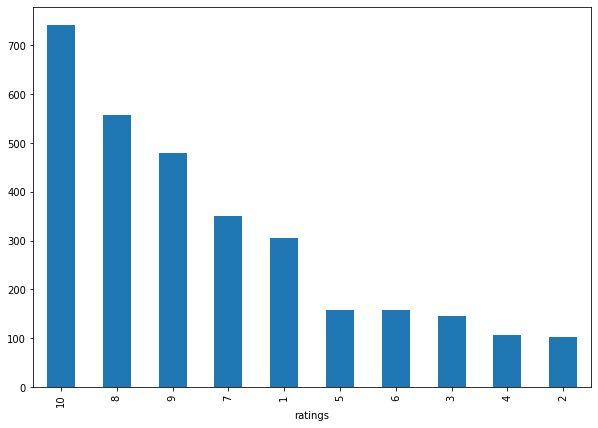

In [4]:
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.show()

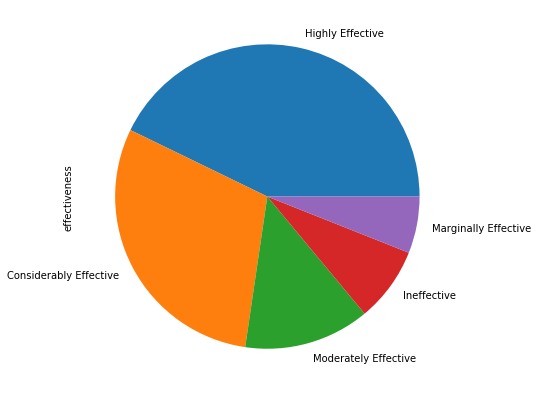

In [5]:
df['effectiveness'].value_counts().plot(kind='pie')
plt.show()

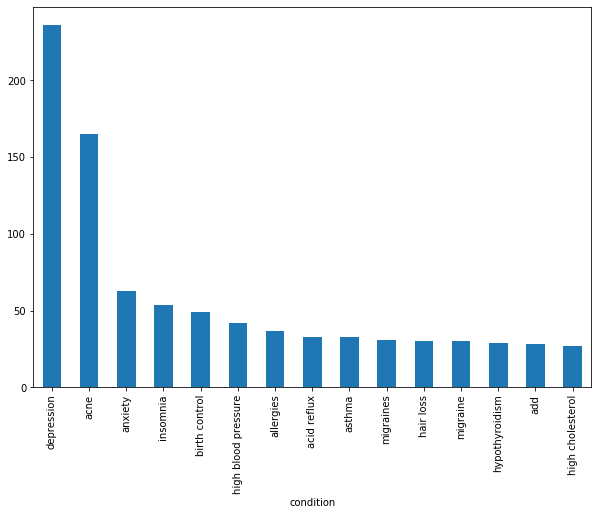

In [6]:
df['condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('condition')
plt.show()

In [7]:
# df['sideEffects'].value_counts()
df['condition'].value_counts()

depression                                       236
acne                                             165
anxiety                                           63
insomnia                                          54
birth control                                     49
                                                ... 
trigeminal neuralgia plus spinal stenosis etc      1
burning feeling in throat and chest                1
sun damage to skin                                 1
htn                                                1
frequent urination                                 1
Name: condition, Length: 1426, dtype: int64

In [8]:
df['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

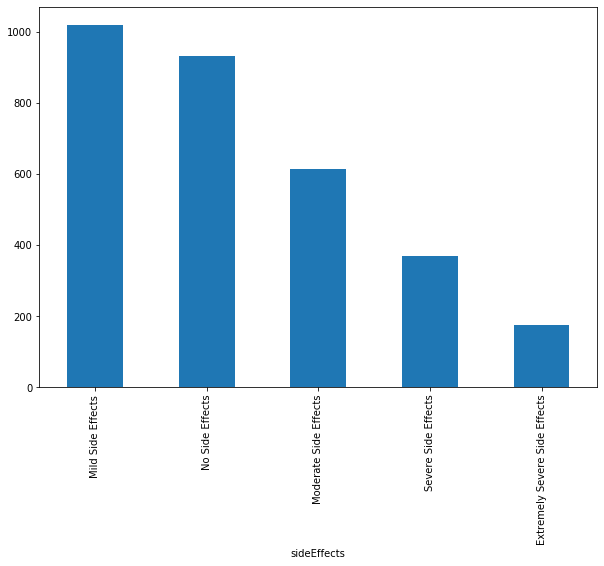

In [9]:
df['sideEffects'].value_counts().plot(kind='bar')
plt.xlabel('sideEffects')
plt.show()

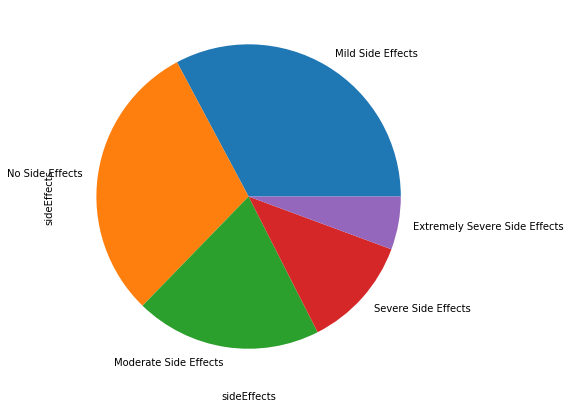

In [10]:
df['sideEffects'].value_counts().plot(kind='pie')
plt.xlabel('sideEffects')
plt.show()

In [11]:
target = df.pop('sideEffects')
df.head()


,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [12]:
#lets convert categorical to numerical

cols = ['urlDrugName', 'effectiveness', 'condition']
for x in cols:
  df[x] = pd.factorize(df[x])[0]
target = pd.factorize(target)[0]
df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [19]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df, target)

In [15]:
# using svm
svm_clf = SVC().fit(x_train, y_train)
svm_pred = svm_clf.predict(x_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.46      0.56      0.50       247
           1       0.43      0.30      0.35       103
           2       0.57      0.57      0.57       234
           3       0.35      0.47      0.40        43
           4       0.42      0.30      0.35       150

    accuracy                           0.47       777
   macro avg       0.45      0.44      0.44       777
weighted avg       0.47      0.47      0.47       777



In [16]:
rf_clf = RandomForestClassifier().fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.39      0.38      0.38       247
           1       0.37      0.31      0.34       103
           2       0.52      0.52      0.52       234
           3       0.35      0.42      0.38        43
           4       0.38      0.42      0.40       150

    accuracy                           0.42       777
   macro avg       0.40      0.41      0.40       777
weighted avg       0.42      0.42      0.42       777

